In [1]:
!git clone https://github.com/saeahgo/Machine-Learning-Perceptron.git

Cloning into 'Machine-Learning-Perceptron'...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting

In [ ]:
# read data
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [ ]:
# convert from df to numpy matrix
train = train.to_numpy(dtype = float)
test = test.to_numpy(dtype = float)

In [ ]:
import keras
from keras.utils.np_utils import to_categorical

train_label = np.array([train[i,0] for i in range (train.shape[0])]) # 60000
test_label = np.array([test[i,0] for i in range (test.shape[0])])

test_1d = test_label

# change the first column as the bias column (1). Even though name is still label, now it's bias column
train[:, 0] = 1 
test[:, 0] = 1

In [ ]:
# labeling 
# convert train label into a 10 dimensional vector
train_label = to_categorical(train_label, 10) # one hot encoding
test_label = to_categorical(test_label, 10) # one hot encoding

In [ ]:
# preprocessing -> standardize(normalize)
train = np.divide(train, 255) # x_train
test = np.divide(test, 255) # x_test

In [ ]:
# initialize the parameters
w = np.random.uniform(low=-0.05, high=0.05, size=(10,785)) # choose random weights
initial_w = w # initial weight to calculate epoch 0

# change the first row to 1 (bias unit)
w[0,:] = 1

eta = 1 # learning rate ### we have three learning rates, 0.001, 0.01, 0.1
epochs = 70
accurate = 0 # to calculate accuracy
test_accurate = 0
accuracy = 0.0
accuracy_test = 0.0
training_accuracy = [] 
test_accuracy = [] 

In [ ]:
from sklearn import metrics

y_pred = np.array([0 for k in range(w.shape[0])])

# transpose the train dataset for calculation
train_t = np.transpose(train) # 785 x 60000
test_t = np.transpose(test)

for epoch in range(epochs):
  pred = np.array([0 for k in range(len(test))]) # store the predictions
  
  # stopping condition
  if (epoch > 20 and abs(test_accuracy[epoch-1] - test_accuracy[epoch-2]) < 0.01): # the difference btw previous accuracy and current accuracy < 0.01
    break

  for i in range(0, len(test)): # each row 60K 
    # compute w dot x at each output unit
    y_pred = w @ test_t[:,i] # y'

    # find the maximum value's index and create t array (prediction array)
    t_test = np.array([0 for k in range (y_pred.shape[0])]) # prediction value
    t_test[np.argmax(y_pred)] = 1

    # store the value to pred for confusion matrix
    pred[i] = np.argmax(y_pred)

    if np.array_equal(test_label[i], t_test) == True: # if it is correct, we don't need to do anything. we just need to count accurate to compute accuracy
      test_accurate += 1

  for i in range(0, len(train)): # each row 60K
    if i == 0:
      y_pred = initial_w @ train_t[:, i]
      
    else: 
      # compute w dot x at each output unit
      y_pred = w @ train_t[:,i] # y'

    # find the maximum value's index and create t array (prediction array)
    t = np.array([0 for k in range (y_pred.shape[0])]) # prediction value
    t[np.argmax(y_pred)] = 1
    
    if np.array_equal(train_label[i], t) == True: # if it is correct, we don't need to do anything. we just need to count accurate to compute accuracy
      accurate += 1
    else: #if np.array_equal(train_label[i], t) != True: #train_label[i].all() != t.all(): 
        y = np.array([0 for k in range(y_pred.shape[0])]) 
        error = np.array([0 for k in range(y_pred.shape[0])])
        for j in range(0, y_pred.shape[0]):
          if y_pred[j] > 0:
            y[j] = 1
          else:
            y[j] = 0 
        
        # get t - y
        error = train_label[i] - y # t 대신에 train label(true) 사용 해야함 ㅜ,ㅜ
        
        # extract each feature (ith feature) to 1-D array
        temp = train_t[:,i].flatten()
 
        # adjust weights
        for a in range(0, len(error)):
          if(error[a] != 0): # need to adjust weights
            for b in range(0, w.shape[1]): # from 0 to 785
              x_i = temp[b].item()
              w[a,b] += eta * error[a] * x_i

  # create confusion matrix with test data
  confusion_matrix = metrics.confusion_matrix(test_1d, pred)
  print(confusion_matrix)
  print("weight is: ", w)
  print("accurate is: ", accurate)
  print("test accurate is: ", test_accurate)
  # after each epoch, calculate accuracy
  '''
  if epoch == 0:
    accuracy = test_accuarate / test.shape[0]
  '''
  accuracy = accurate / train.shape[0]
  accuracy_test = test_accurate / test.shape[0]
  training_accuracy.append(100 * accuracy) # the number of rows #.append(accuracy)
  test_accuracy.append(100 * accuracy_test)
  '''
  print("training accuracy is: ", accuracy)
  print("training accuracy array is: ", training_accuracy)
  print("test accuracy is: ", accuracy_test)
  print("test accuracy array is: ", test_accuracy)
  '''
  #print(training_accuracy)
  accurate = 0 # for next iteration
  test_accurate = 0
               


[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]
weight is:  [[ 0.63137255  1.          1.         ...  1.          1.
   1.        ]
 [-0.08841402  0.01108968  0.00323179 ... -0.02454585 -0.03543104
  -0.04612109]
 [-0.18178465 -0.00774854  0.00867285 ...  0.00182565 -0.00439825
  -0.01900228]
 ...
 [-0.02395823  0.0392863  -0.00257836 ... -0.00166181  0.01548101
  -0.04861297]
 [-1.56663454  0.04812869  0.01194615 ...  0.02425355  0.01367373
  -0.0448292 ]
 [-0.47802943 -0.00872055  0.02210575 ... -0.03325639 -


if label(10x1) = train_label and target(10x1) = t vectors are the same (correct prediction), don't change the weights and go on to the next training example
1. compare two values
2. check they are the same (target and train_label)
3. if they are the same, don't need to change weights.
4. if they are not the same, update all weights in the perceptron
5. the equation to adjust weights: $w_i \leftarrow w_i - \eta * (t-y) * x_i$ 
6. to do 5, first we need to decide t (10D vector) and y (10D vector)
7. calculate new weights

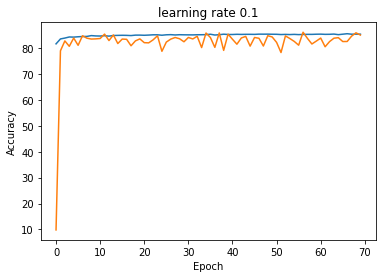

In [ ]:
plt.title("learning rate 0.1")
plt.plot(training_accuracy, label = 'Train')
plt.plot(test_accuracy, label = 'Test')
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Epoch', fontsize=10)
plt.show()

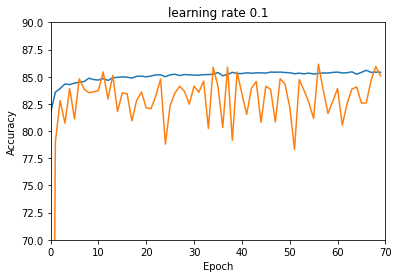

In [ ]:
plt.title("learning rate 0.1")
plt.plot(training_accuracy, label = 'Train')
plt.plot(test_accuracy, label = 'Test')
plt.ylabel('Accuracy', fontsize = 10)
plt.xlabel('Epoch', fontsize=10)
plt.xlim(0, 70)
plt.ylim(70, 90)
plt.show()